## Plotting with pandas and seaborn

- __We have another python library called 'Seaborn' for a statistical graphical, this library simplify many common visualization types__

### Line plots
- __Series and DataFrame each have a plot attributes for making some basic plot types__
- __By default 'plot' makes line plots__

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

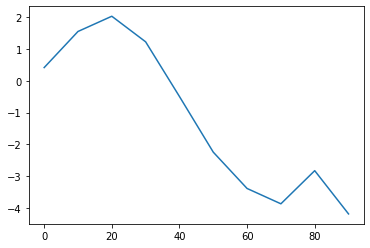

In [5]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

- __Dataframe examples__

<AxesSubplot:>

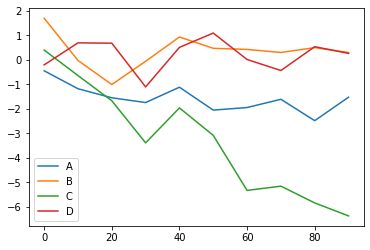

In [6]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10)
                )
df.plot()

- __df.plot() is equivalent to df.plot.line()__

### Bar graph
- __'plot.bar()' make vertical bar plots__
- __'plot.barh()' makes horizontal bar plots__
- __In these case Series or DataFrame index will be used as the 'x' or 'y' ticks__

<AxesSubplot:>

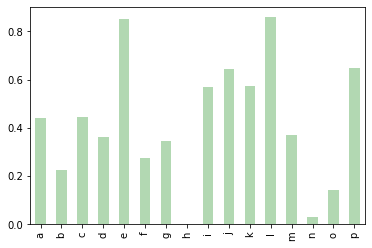

In [19]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(color='g', alpha=0.3)

<AxesSubplot:>

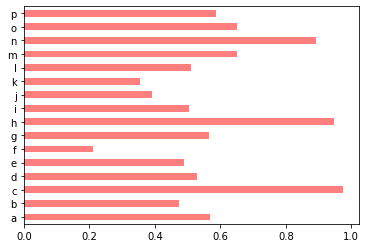

In [26]:
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.barh(color='r',alpha=0.5)

- __With DataFrame, bar plots group the values in each row together in a group in bars side by side, for each value__
- __example__

In [27]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus')
                 )
df

Genus,A,B,C,D
one,0.678879,0.946023,0.635293,0.469594
two,0.851309,0.476342,0.373716,0.808048
three,0.140630,0.780304,0.257969,0.400349
four,0.472187,0.541156,0.952295,0.259687
five,0.478008,0.708887,0.485950,0.181496
six,0.926763,0.186721,0.359503,0.199662


<AxesSubplot:>

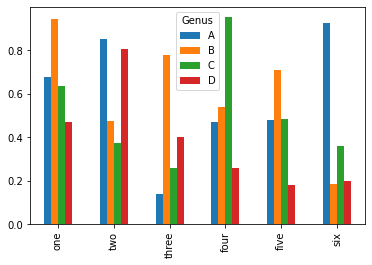

In [34]:
df.plot.bar()

- __Let's draw horizental bar graph__
- __by passing 'stacked = True', by resulting in value in each row being stacked together__

<AxesSubplot:>

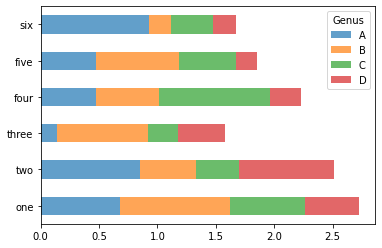

In [32]:
df.plot.barh(alpha=0.7, stacked=True)

- __Let's say we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a cross-tabulation by day and party size:__

In [6]:
import pandas as pd

tips = pd.read_csv('files/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


- __Then, normalize so that each row sums to 1 and make the plot__

In [9]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<AxesSubplot:xlabel='day'>

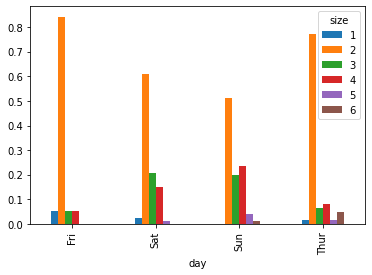

In [10]:
party_pcts.plot.bar()

#### Histograms and Density Plots
- __Let's use seaborn__


In [ ]:
pip install seaborn

In [13]:
import seaborn as sns
import numpy as np

/home/sundar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

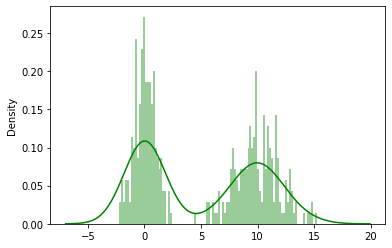

In [15]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='g')

### Scatter or Point Plots

- __Points plots or scatter plots is useful for examining the relationship between two dimensional data series__
- __for example, here we load macrodata dataset from the statsmodel project, select few variables, then compute log differnce__

In [16]:
macro = pd.read_csv('files/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [17]:
#select specific columns

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


- __The numpy. log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements__

- __The diff() function calculates the difference of a DataFrame element compared with another element in the DataFram__

- __dropna() function is used to remove rows and columns with Null/NaN values.__


In [18]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


- __We can then use seaborn’s 'regplot' method, which makes a scatter plot and fits a linear regression line__

- __Now let's draw a graphs__

/home/sundar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

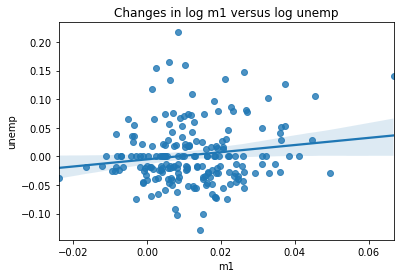

In [24]:
sns.regplot('m1', 'unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

- __In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables, this is known as a pairs plot or scatter plot matrix__
- __Making such a plot from scratch is a bit of work, so seaborn has a convenient 'pairplot' function__

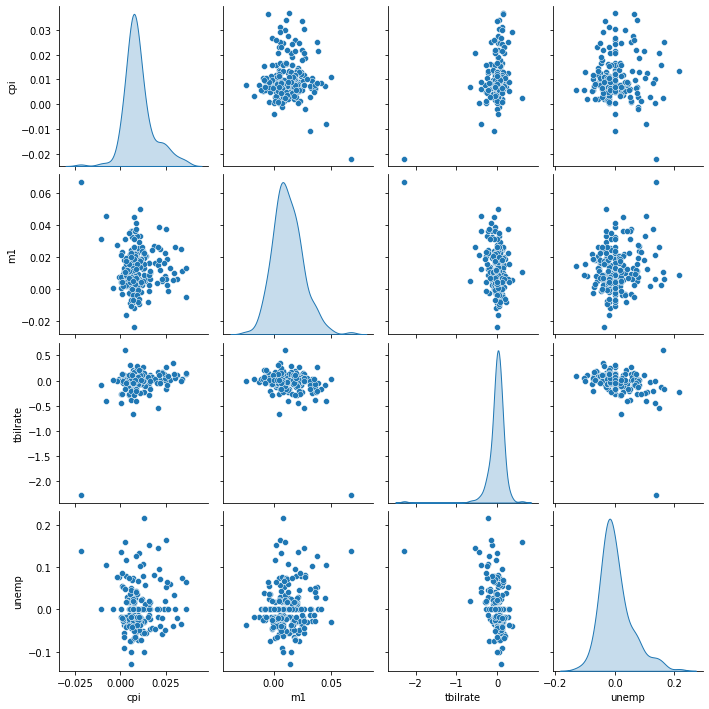

In [26]:
sns.pairplot(trans_data, diag_kind='kde')

### Facet Grids and Categorical Data

- __If we have datasets where we have additional grouping dimensions, then we can use facet grid, for this seaborn have built-in funciton called 'factorplot' it simplify making many kinds of faceted plots__
- __example__